MINI DDSM DATASET

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import cv2
from skimage import exposure
from sklearn.model_selection import train_test_split

In [2]:
data_path = r'C:\Users\qptja\Desktop\archive\Mini_DDSM_Upload'

cancer_df = pd.read_excel(os.path.join(data_path, r'C:\Users\qptja\Desktop\archive\Mini_DDSM_Upload\List_Cancer.xlsx'))
cancer_files = cancer_df['fileName'].tolist()
cancer_views = cancer_df['View'].tolist()


benign_df = pd.read_excel(os.path.join(data_path, 'C:/Users/qptja/Desktop/archive/Mini_DDSM_Upload/List_Benign.xlsx'))
benign_files = benign_df['fileName'].tolist()
benign_views = benign_df['View'].tolist()

normal_df = pd.read_excel(os.path.join(data_path, 'C:/Users/qptja/Desktop/archive/Mini_DDSM_Upload/List_Normal.xlsx'))
normal_files = normal_df['fileName'].tolist()
normal_views = normal_df['View'].tolist()

In [3]:
def preprocess_image(image_path, view):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    
    # Enhance the contrast using histogram equalization
    print('Applying histogram equalization...')
    image = exposure.equalize_hist(image)
    
    # Resize the image to a uniform size (e.g. 512x512)
    print('Resizing image...')
    image = cv2.resize(image, (512, 512))
    
    # Scale the pixel values between 0 and 1
    image = image / 255.0
    
    # Flip the image horizontally if it is a right view
    if view.endswith('R'):
        image = cv2.flip(image, 1)
    
    return image

In [4]:
# Initialize lists to store the preprocessed images and labels
X = []
y = []
print('here')
# Preprocess the Cancer images
for i, file in enumerate(cancer_files):
    view = cancer_views[i]
    #image_path = os.path.join(data_path, 'Cancer', view, file + '.png')
    image_path = os.path.join(data_path, 'Cancer' , file)
    #print(image_path)
    image = preprocess_image(image_path, view)
    X.append(image)
    y.append(1)
#C:\Users\qptja\Desktop\archive\Mini_DDSM_Upload\Cancer\1_C_0001_1.RIGHT_MLO.LJPEG.1_highpass.png
# Preprocess the Benign images
for i, file in enumerate(benign_files):
    view = benign_views[i]
    image_path = os.path.join(data_path, 'Benign', file)
    image = preprocess_image(image_path, view)
    X.append(image)
    y.append(0)

# # Preprocess the Normal images
for i, file in enumerate(normal_files):
    view = normal_views[i]
    image_path = os.path.join(data_path, 'Normal', file)
    image = preprocess_image(image_path, view)
    X.append(image)
    y.append(0)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


here
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizi

KeyboardInterrupt: 

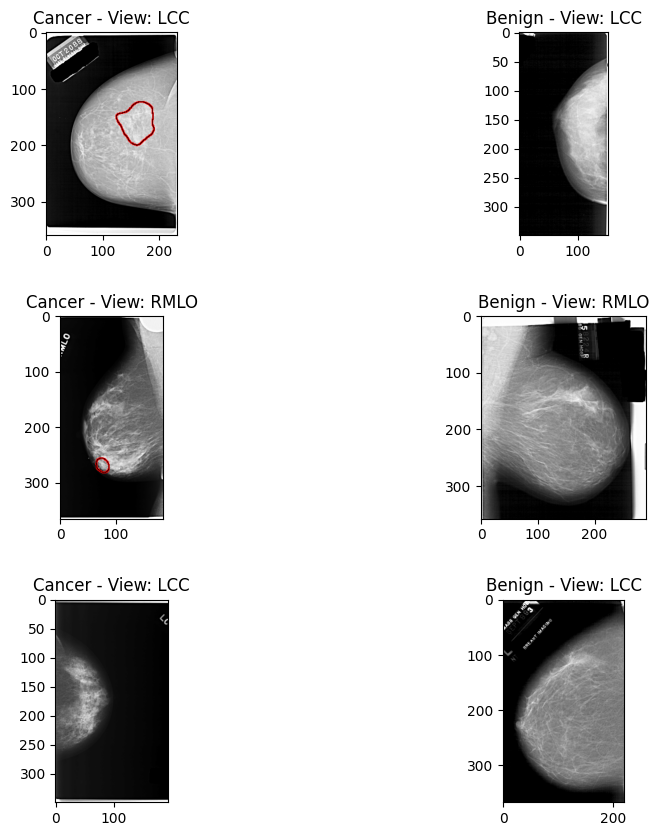

Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...
Applying histogram equalization...
Resizing image...


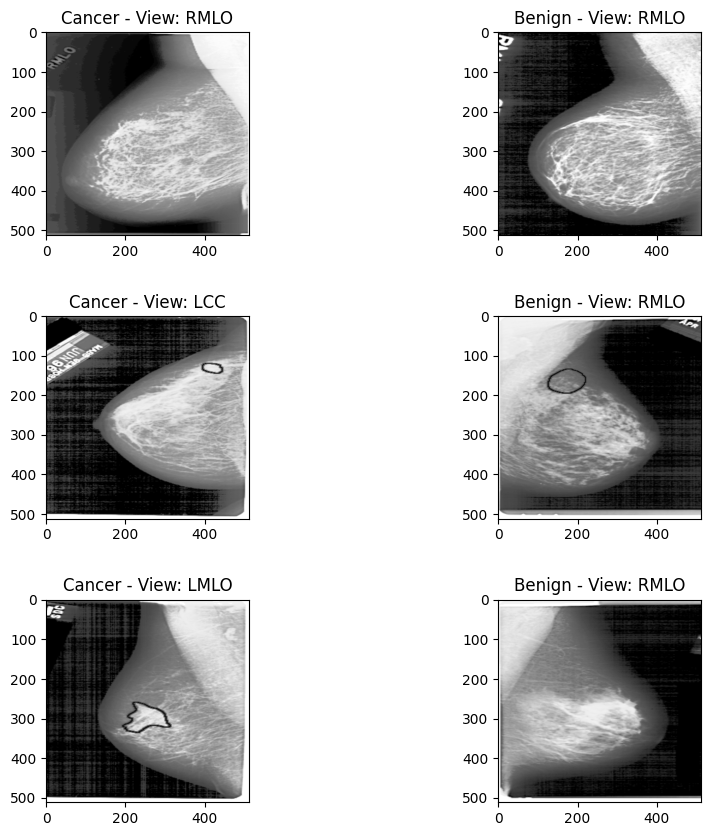

In [5]:
import random
import matplotlib.pyplot as plt

# Display some randomly selected mammogram images before preprocessing
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(3):
    idx = random.randint(0, len(cancer_files)-1)
    img = plt.imread(os.path.join(data_path, 'Cancer', cancer_files[idx]))
   
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].set_title(f'Cancer - View: {cancer_views[idx]}')

    idx = random.randint(0, len(benign_files)-1)
    img = plt.imread(os.path.join(data_path, 'Benign', benign_files[idx]))
    axs[i, 1].imshow(img, cmap='gray')
    axs[i, 1].set_title(f'Benign - View: {benign_views[idx]}')

plt.show()

# Display some randomly selected mammogram images after preprocessing
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(3):
    idx = random.randint(0, len(cancer_files)-1)
    img = preprocess_image(os.path.join(data_path, 'Cancer', cancer_files[idx]),view)
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].set_title(f'Cancer - View: {cancer_views[idx]}')

    idx = random.randint(0, len(benign_files)-1)
    img = preprocess_image(os.path.join(data_path, 'Benign', benign_files[idx]),view)
    axs[i, 1].imshow(img, cmap='gray')
    axs[i, 1].set_title(f'Benign - View: {benign_views[idx]}')

plt.show()
